In [6]:
from utils import * 
from algorithms import *
from agents import *

In [7]:
numRounds, numPeriods, numSteps = 1, 10000, 10
numBuyers, numSellers, numTokens = 2, 4, 4
gameTypes, seed = '1001', 42
disclosure = []
depth = 0
gameData = [gameTypes, numBuyers, numSellers, numTokens, numRounds, numPeriods, numSteps, seed]
verbose = -1
num_states = numStates = 2
buyers = [Reinforcer(gameData, disclosure, index=0, buyer=1, reinforcer=1, numStates = 2, algo='PPO1'),
          Reinforcer(gameData, disclosure, index=0, buyer=1, reinforcer=1, numStates = 2, algo='PPO1')]
          #ZeroIntelligence(gameData, disclosure, index=0, buyer=1, reinforcer=0),
          #ZeroIntelligence(gameData, disclosure, index=0, buyer=1, reinforcer=0)]

sellers = [ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0),
           ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0),
           ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0),
           ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0)]
log = Log(gameData, disclosure)
rnd = 0

In [8]:
for rnd in range(numRounds):
    startRounds(gameData, log, buyers, sellers, rnd)
    score1, score2 = 0.0, 0.0
    for period in range(numPeriods):
        startPeriods(buyers, sellers)
        for step in range(numSteps):
            # start
            startSteps(buyers, sellers)

            # set state
            buyers[0].state = [buyers[0].periodSteps, buyers[0].periodTrades]
            buyers[1].state = [buyers[1].periodSteps, buyers[1].periodTrades]

            # trade
            bids, asks = collectOffers(buyers, sellers)
            currentAsk, currentAskIdx, currentBid, currentBidIdx = bestOffers(bids, asks)
            price, buy, sell = trade(buyers, sellers, currentAsk, currentAskIdx, currentBid, currentBidIdx)
            bprofit, sprofit = 0, 0
            if price > 0:
                buyers[currentBidIdx].transact(price)
                sellers[currentAskIdx].transact(price)
                bprofit = buyers[currentBidIdx].stepProfits
                sprofit = sellers[currentAskIdx].stepProfits
            if currentBidIdx == 0:
                score1 += bprofit
            if currentBidIdx == 1:
                score2 += bprofit
                
            # log and end step
            log.addStep([rnd, period, step, bids, asks, currentBid, currentBidIdx, currentAsk, currentAskIdx, buy, sell, price, price>0, bprofit, sprofit])
            observe(buyers, sellers, log.disclose())
            endSteps(buyers, sellers) # updates period counters

            # new state and done
            buyers[0].newState = [step+1, buyers[0].periodTrades]
            buyers[1].newState = [step+1, buyers[1].periodTrades]
            if step == numSteps - 1:
                buyers[0].done = True
                buyers[1].done = True
            else:
                buyers[0].done = False
                buyers[1].done = False

            # load data and train
            agentsObserve(buyers, sellers)
            agentsTrain(buyers, sellers)

        endPeriods(buyers, sellers)
        if period%100==0:
            print(score1/100, score2/100)
            score1, score2 = 0.0, 0.0
    endRounds(buyers, sellers)

1.1334138999636632 1.3153292412397928
126.50856223166093 124.59867273438095
130.36100449837193 122.55085637256575
127.53464120536567 119.92069705397455
126.98684681082821 121.80988520171742
126.16587856558313 119.64032470405331
125.75403319926131 119.32872097855027
126.38667320146061 123.09031508587186
127.82910978030631 122.0910494666667
126.40769986772986 121.33841065133221
124.1993753621824 123.16946702308968
125.67475659017613 122.45999737238164
124.81301523123602 126.52854847920435
122.63974494264399 123.32666254441399
123.47996818159748 122.91479229489602
121.83597753456634 124.9517635376375
120.54294799678273 124.75562820380219
123.14589438534392 125.10313240326097
122.49364267113715 123.8267742184437


KeyboardInterrupt: 

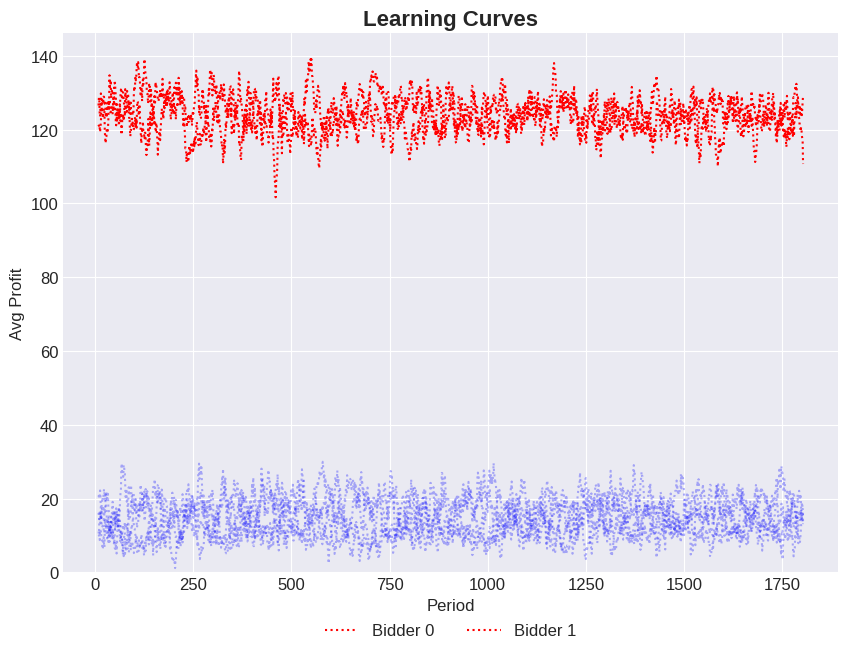

In [10]:
log.graphLearning(rolling_window = 10, trackBuyersIdx=[0,1], trackSellersIdx=[])

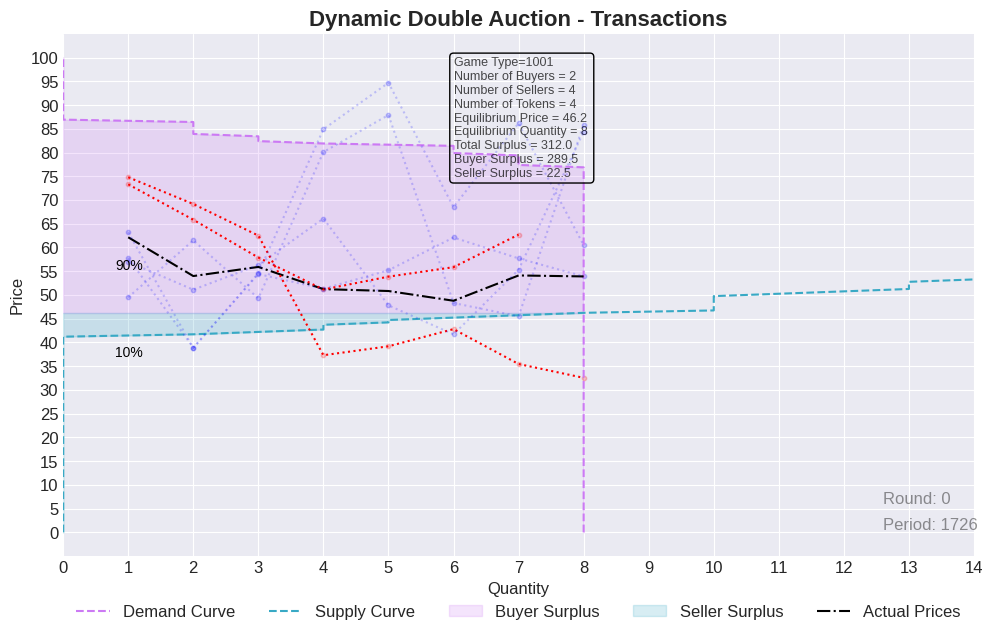

In [5]:
log.graphSales(0, period-1, trackBuyersIdx=[0,1], trackSellersIdx=[])

In [7]:
log.roundData.buyerValues.item()

array([[98.66747422, 81.34610326, 79.18073043, 65.91406304],
       [99.69105289, 83.27003575, 64.27784395, 63.711074  ]])

In [11]:
log.stepData.tail(15)

,rnd,period,step,bids,asks,currentBid,currentBidIdx,currentAsk,currentAskIdx,buy,sell,price,sale,bprofit,sprofit
18021,0,1802,1,"[52.807912528116894, 55.482530197734285]","[41.1, 49.3, 79.6, 48.8]",55.482530,1.0,41.1,0,True,True,48.291265,True,38.481381,2.828618
18022,0,1802,2,"[52.03019725769887, 46.17532361735666]","[61.5, 45.0, 44.4, 44.9]",52.030197,0.0,44.4,2,True,True,48.215099,True,35.288009,4.481600
18023,0,1802,3,"[34.2130536256812, 43.80633474248854]","[51.0, 43.0, 75.9, 57.2]",43.806335,1.0,43.0,1,True,True,43.403167,True,38.266374,1.665556
18024,0,1802,4,"[29.374556752833534, 33.51477212649672]","[66.1, 54.4, 49.8, 41.3]",33.514772,1.0,41.3,3,True,False,41.300000,True,38.271672,-0.226854
18025,0,1802,5,"[24.31037528536051, 24.860626911736002]","[44.8, 46.3, 78.5, 55.9]",24.860627,1.0,44.8,0,True,False,44.800000,True,32.317605,-1.099928
18026,0,1802,6,"[18.869356089213206, nan]","[58.4, 62.8, 63.3, 78.3]",18.869356,0.0,58.4,0,True,False,58.400000,True,23.760026,11.881579
18027,0,1802,7,"[14.606266691498442, nan]","[58.5, 60.8, 74.8, 64.4]",14.606267,0.0,58.5,0,True,False,58.500000,True,22.939119,5.085915
18028,0,1802,8,"[nan, nan]","[nan, 79.9, 66.3, 78.8]",NaN,NaN,66.3,2,NaN,NaN,NaN,False,0.000000,0.000000
18029,0,1802,9,"[nan, nan]","[nan, 58.0, 78.8, 67.6]",NaN,NaN,58.0,1,NaN,NaN,NaN,False,0.000000,0.000000
18030,0,1803,0,"[69.92818535083092, 69.59059140379748]","[83.8, 50.4, 72.9, 63.9]",69.928185,0.0,50.4,1,True,True,60.164093,True,26.671508,18.426481


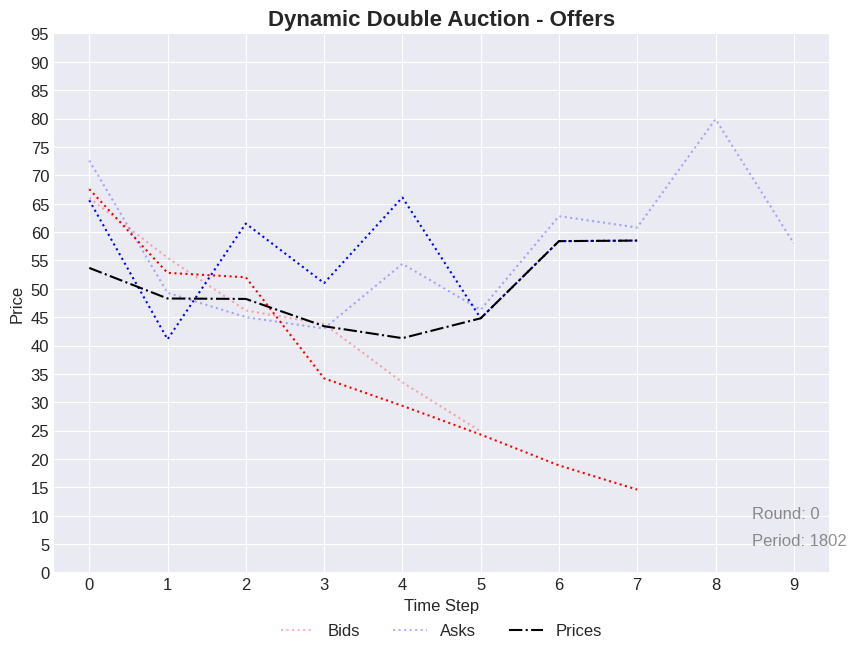

In [12]:
log.graphOffers(0, period-1, trackBuyersIdx=[0], trackSellersIdx=[0])

In [10]:
log.graphTraining(maxNumPeriods=period-1, skip = int((period-1)/50), trackBuyersIdx = [0])